# Activity : 3
Date: 11-07-2021

Name: Nikita Sunil Patil.

Email_id : patilnikita7188@gmail.com




**Problem Statement:**

1) Read the data : AUTO.csv  

2) Perform descriptive analysis, exploratory analysis, ask question to perform inferential statistics on data. Check if correlation exist or not.

3) implement linear regression using sklearn package and statsmodels

4)check p-values to select proper features and implement above models again.

5) interpret the metrics and r2 score, adj r2 score

**Variable information:**

1) mpg: Miles Per Gallon

2) cylinders: Number of cylinders used

3) displacement: The engine capacity

4) horsepower: the power produced by a car's engine

5) weight: weight of vehicle.

6) acceleration: the rate at which an object changes its velocity.

7) model year: when model build up

8) origin: origin 

9) name: car name

In [ ]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
from matplotlib import style
from statsmodels.stats import weightstats
import scipy.stats as stats
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv(r'/content/Auto.csv')

In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
df.shape

(397, 9)

There are 397 observations with 9 variables

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

The variables are mpg, cylinders, displacement, horsepower, weight, acceleration, year, origin and name.

In [ ]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Above table gives following information : 

There are 397 total observations. The second raw gives mean of each observation . In same manner 3rd raw gives standard deviation, 4th raw gives minium value for each observation, 5th , 6th and 7th raw give Q1, Q2 and Q3 respectively. 8th raw gives maximum value for each variable. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


Data types :

1) Float data types : mpg , displacement , acceleration .

2) Integer data type : cylinders , weight , year , origin .

3) Object data type : horsepower , name .

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
396,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


The maximum count of mpg is 60 above and the values are in the class of 20


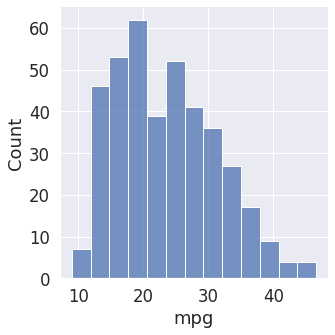

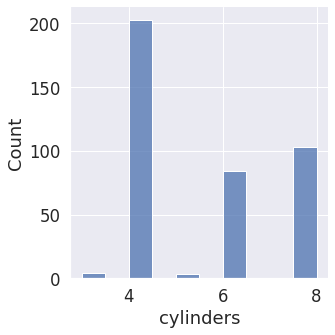

In [ ]:
sns.displot(data=df, x='mpg')
sns.displot(data=df, x='cylinders')

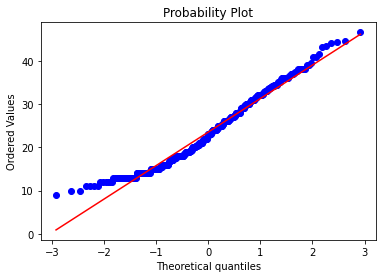

In [ ]:
fig=plt.figure()
stats.probplot(df['mpg'], plot=plt)
plt.show()

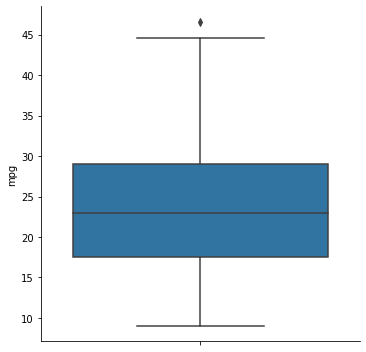

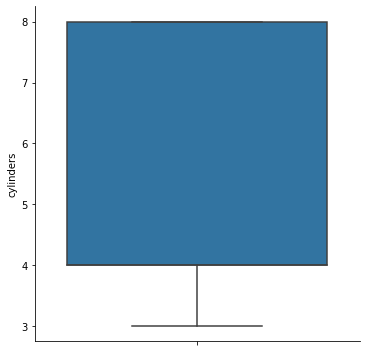

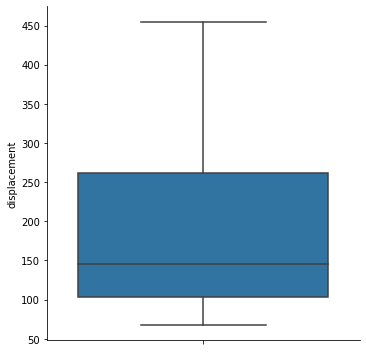

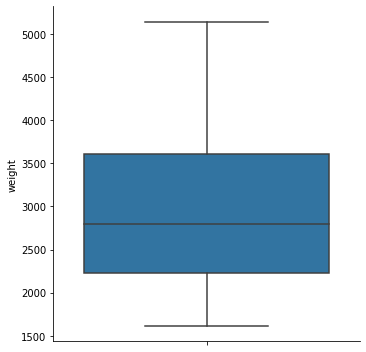

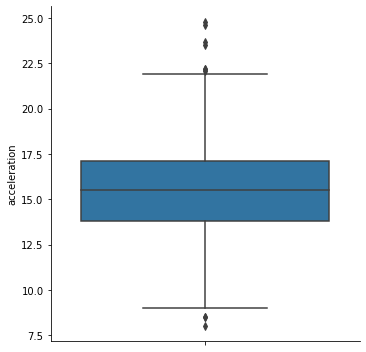

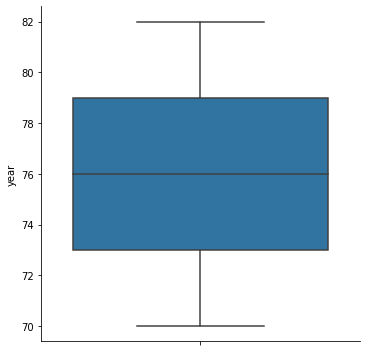

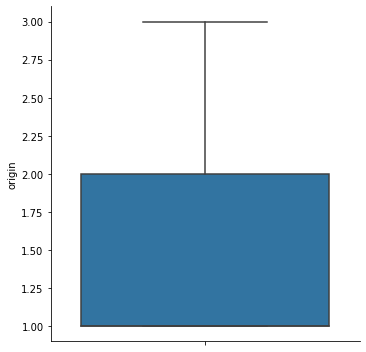

In [ ]:
sns.catplot(data=df, y='mpg', kind='box')  
sns.catplot(data=df, y='cylinders', kind='box')
sns.catplot(data=df, y='displacement', kind='box')
sns.catplot(data=df, y='weight', kind='box')
sns.catplot(data=df, y='acceleration', kind='box')
sns.catplot(data=df, y='year', kind='box')
sns.catplot(data=df, y='origin', kind='box')

In [ ]:
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

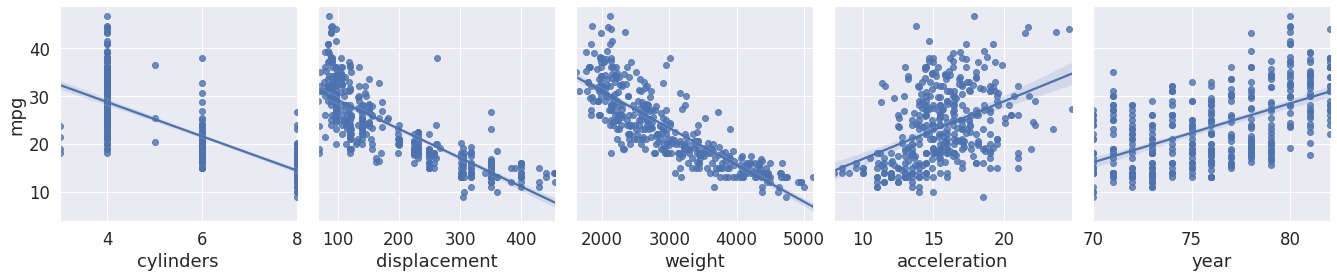

In [ ]:
sns.pairplot(df,
             x_vars =['cylinders','displacement','weight','acceleration','year'],
             y_vars = 'mpg',
             height=4,
             aspect=0.95,
             kind= 'reg')

In [ ]:
feature_cols = ['cylinders','displacement','weight','acceleration','year']
x = df[feature_cols]
y = df['mpg']
type(y)

pandas.core.series.Series

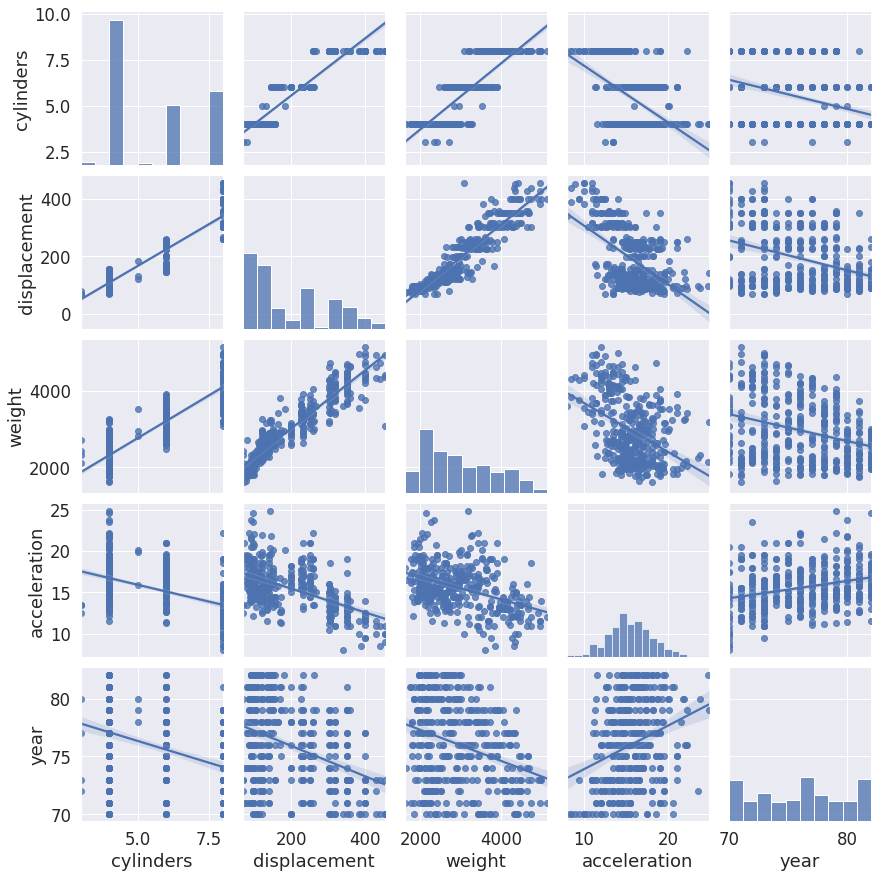

In [ ]:
sns.pairplot(x,kind='reg')

In [ ]:
df.corr()

,mpg,cylinders,displacement,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.933104,-0.544162,-0.369804,-0.610664
weight,-0.831739,0.897017,0.933104,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.581265,0.210084,0.184314,1.000000


There is strong correlation between acceleration , year and origin with mpg. and remaining values does not shows any type of correlation with mpg.

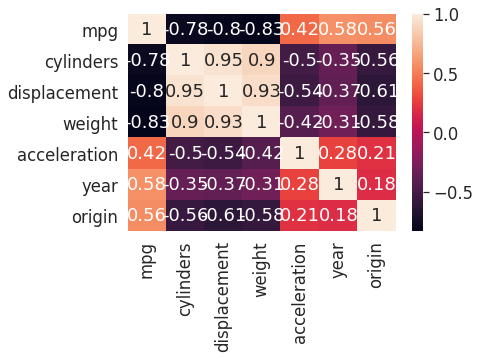

In [ ]:
sns.heatmap( df.corr(), annot= True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train, y_test = train_test_split(x, y,random_state=1, test_size=0.3)

In [ ]:
a,B,C,D= train_test_split(x,y,random_state=1 , test_size=0.3)

In [ ]:
type(x_train.size)

numpy.int64

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(277, 5)
(277,)
(120, 5)
(120,)


In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(x_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
linreg.coef_

array([-0.1603492 ,  0.00884386, -0.00728374,  0.07082687,  0.78660562])

It gives slope i.e. Standardize coeficient of beta are beta_1 = -0.1603492 , beta_2 = 0.00884386, beta_3 = -0.00728374, beta_4 =  0.07082687, beta_5 = 0.78660562

In [ ]:
linreg.intercept_

-16.499872801336004

It gives intercept value i.e. beta_0

In [ ]:
y_pred = linreg.predict(x_test)

In [ ]:
y_test

174    18.0
359    28.1
250    19.4
274    20.3
283    20.2
       ... 
382    38.0
39     14.0
171    24.0
271    23.2
247    39.4
Name: mpg, Length: 120, dtype: float64

In [ ]:
y_pred    #y_hat

array([22.33806098, 25.73915572, 20.11506245, 25.72532639, 24.23928711,
       15.34213474, 28.66470333, 33.65452567, 16.81420691, 10.85068121,
       31.29609706, 16.85909324, 22.40691612, 26.46632843, 35.68645981,
       22.50063237, 10.16329295, 21.07241187,  8.17898464, 32.39902227,
       25.57350805, 31.18175028, 21.65939006, 25.07820586, 26.67314972,
       28.42286504, 31.60202337, 31.81960594, 15.57263302, 29.48321836,
       28.6003626 , 10.2188739 , 20.23845882, 27.75841144, 25.93856646,
       13.79230713, 28.33625623,  8.38079525, 32.65971916, 24.99447467,
       26.07543554, 25.71786255, 20.84716913, 32.55674043, 27.4574305 ,
       22.43622298, 20.98815426, 11.66750378, 28.03223528, 19.12918454,
       24.29160024, 27.79225519, 16.40906544, 11.88552722, 30.30644678,
       24.89104764,  9.68047882, 12.80331689, 30.10189851, 34.96461396,
       34.7046567 , 34.78151518, 18.10776549, 28.82730017, 19.76577791,
       32.0786933 , 28.10890027, 26.94475216, 30.7431743 , 12.61

In [ ]:
from sklearn import metrics
print('y-intercept:',linreg.intercept_)
print('beta coefficient:',linreg.coef_)
print('MEAN ABS ERROR :',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('Root mean sq Error RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('r2 value :' , metrics.r2_score(y_test,y_pred))

y-intercept: -16.499872801336004
beta coefficient: [-0.1603492   0.00884386 -0.00728374  0.07082687  0.78660562]
MEAN ABS ERROR : 2.5685416004456347
MSE: 11.08037699936921
Root mean sq Error RMSE: 3.328720024178845
r2 value : 0.8159013270699277


Mean ABS Error measures the accuracy for continuous variable. RMSE is measures the average magnitude of the error.

Here, Mean ABS Error < Root mean square error ( MAE < RMSE ) , the difference between then gives the value of variance in the sample.

The mean square error (MSE) indicates the distance from points from regresion line and these distance line the "errors" and it gives 11.08037699936921 . 

Here R-square is 0.815901327099277 and it reveals that 81.59% of the data fit the regression model.

In [ ]:
feature_cols=['acceleration','year']

x =df[feature_cols]

y = df.mpg

x_train ,x_test,y_train, y_test = train_test_split(x, y,random_state=1)

linreg.fit(x_train , y_train)

y_pred= linreg.predict(x_test)

print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

5.881710501661505


By using train and test , MSE is reduced and it is 5.881710501661505

In [ ]:
import statsmodels.formula.api as smf
sm_model = smf.ols(formula ='mpg ~ cylinders + displacement + weight + acceleration + year',
                   data = df).fit()

In [ ]:
sm_model2 = smf.ols(formula ='mpg ~ acceleration + year',
                   data = df).fit()

In [ ]:
sm_model.params

Intercept      -15.056502
cylinders       -0.299634
displacement     0.007792
weight          -0.006892
acceleration     0.089140
year             0.760376
dtype: float64

In [ ]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     332.9
Date:                Sun, 11 Jul 2021   Prob (F-statistic):          1.91e-138
Time:                        13:52:16   Log-Likelihood:                -1050.2
No. Observations:                 397   AIC:                             2112.
Df Residuals:                     391   BIC:                             2136.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -15.0565      4.144     -3.633      0.000     -23.205      -6.908
cylinders       -0.2996      0.329     -0.910      0.363      -0.947       0.348
displacement     0.0078      0.007      1.091      0.276      -0.006       0.022
weight          -0.0069      0.001    -11.567      0.000      -0.008      -0.006
acceleration     0.0891      0.078      1.136      0.257      -0.065       0.243
year             0.7604      0.051     14.965      0.000       0.660       0.860
==============================================================================
Omnibus:                       36.387   Durbin-Watson:                   1.221
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.970
Skew:                           0.617   Prob(JB):                     7.02e-13
Kurtosis:                       4.364   Cond. No.                     7.45e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Dependent variable is mpg. R - squared value signifies the "percentage variation in dependent that is explained by independent variables. Here 81% variation is explained by independent variables. Values of AIC (Akaike's Information Criteria) and BIC (Bayesian Information Criteri) are 2112 and 2136 respectively. 

In [ ]:
sm_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     137.1
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           6.42e-46
Time:                        13:52:16   Log-Likelihood:                -1274.8
No. Observations:                 397   AIC:                             2556.
Df Residuals:                     394   BIC:                             2567.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -69.8280      6.243    -11.186      0.000     -82.101     -57.555
acceleration     0.7975      0.115      6.948      0.000       0.572       1.023
year             1.0651      0.086     12.451      0.000       0.897       1.233
==============================================================================
Omnibus:                       24.890   Durbin-Watson:                   0.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.900
Skew:                           0.258   Prob(JB):                      0.00158
Kurtosis:                       2.283   Cond. No.                     1.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Dependent variable is mpg. R - squared value signifies the "percentage variation in dependent that is explained by independent variables. Here only 41% variation is explained by independent variables. Values of AIC (Akaike's Information Criteria) and BIC (Bayesian Information Criteri) are 2556 and 2567 respectively. 

If we compare AIC and BIS for both the model then we can say that model first is best model as compare to model 2 because model 1 have lesser value as compare with model 2.

In [ ]:
sm_model.pvalues

Intercept       3.175441e-04
cylinders       3.633163e-01
displacement    2.760267e-01
weight          8.134976e-27
acceleration    2.568137e-01
year            2.378358e-40
dtype: float64

In [ ]:
for i in sm_model.pvalues:
  print(i)
  if i < 0.05:
    print("TRUE reject null")
  else:
      print("False accept null")

0.0003175441456701162
TRUE reject null
0.3633162739315645
False accept null
0.2760266524813105
False accept null
8.134976292202608e-27
TRUE reject null
0.25681368277699257
False accept null
2.378358053432305e-40
TRUE reject null


In [ ]:
sm_model= smf.ols(formula='mpg ~ acceleration + year', data= df).fit()

print(sm_model.rsquared, sm_model.rsquared_adj)

sm_model = smf.ols(formula='mpg ~ cylinders + displacement + weight + acceleration + year',
                   data= df).fit()

print ("cyli+disp.+wei.:" ,sm_model.rsquared, sm_model.rsquared_adj ) 

0.4103489037093966 0.4073557509363479
cyli+disp.+wei.: 0.8097658191224338 0.8073331569628741


1) One sample t - test

In [ ]:
stats.ttest_1samp(df['mpg'], 23)

Ttest_1sampResult(statistic=1.3134263843361054, pvalue=0.18979978994754373)

Here p value > 0.05

accept null Hypothesis

2) One sample Z test with displacement and mpg

In [ ]:
 weightstats.ztest(df['displacement'],df['mpg'], value=170, alternative='two-sided' )

(0.0032125270014785015, 0.9974367787132402)

here p value > 0.05 

accept null hypothesis